# Fatima-AI-304
***logistic reggression***


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df=pd.read_csv("/content/accident.csv")
display(df.head())

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [39]:
df.describe()

,Age,Speed_of_Impact,Survived
count,200.00000,197.000000,200.00000
mean,43.42500,70.441624,0.50500
std,14.94191,30.125298,0.50123
min,18.00000,20.000000,0.00000
25%,31.00000,43.000000,0.00000
50%,43.50000,71.000000,1.00000
75%,56.00000,95.000000,1.00000
max,69.00000,119.000000,1.00000


In [40]:
display(df.isnull().sum())

,0
Age,0
Gender,1
Speed_of_Impact,3
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [41]:
print("\nDuplicate Rows:", df.duplicated().sum())



Duplicate Rows: 0


In [42]:

print(df.dtypes)

Age                  int64
Gender              object
Speed_of_Impact    float64
Helmet_Used         object
Seatbelt_Used       object
Survived             int64
dtype: object


In [43]:
print(df.nunique())

Age                51
Gender              2
Speed_of_Impact    80
Helmet_Used         2
Seatbelt_Used       2
Survived            2
dtype: int64


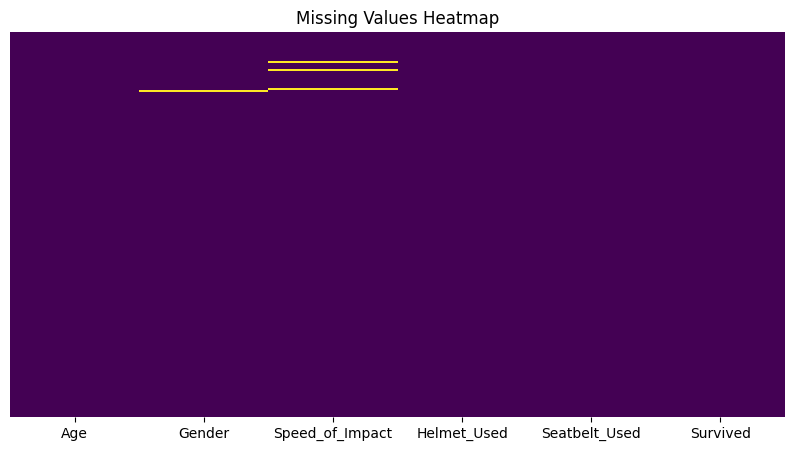

In [44]:
# 1. Missing values heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

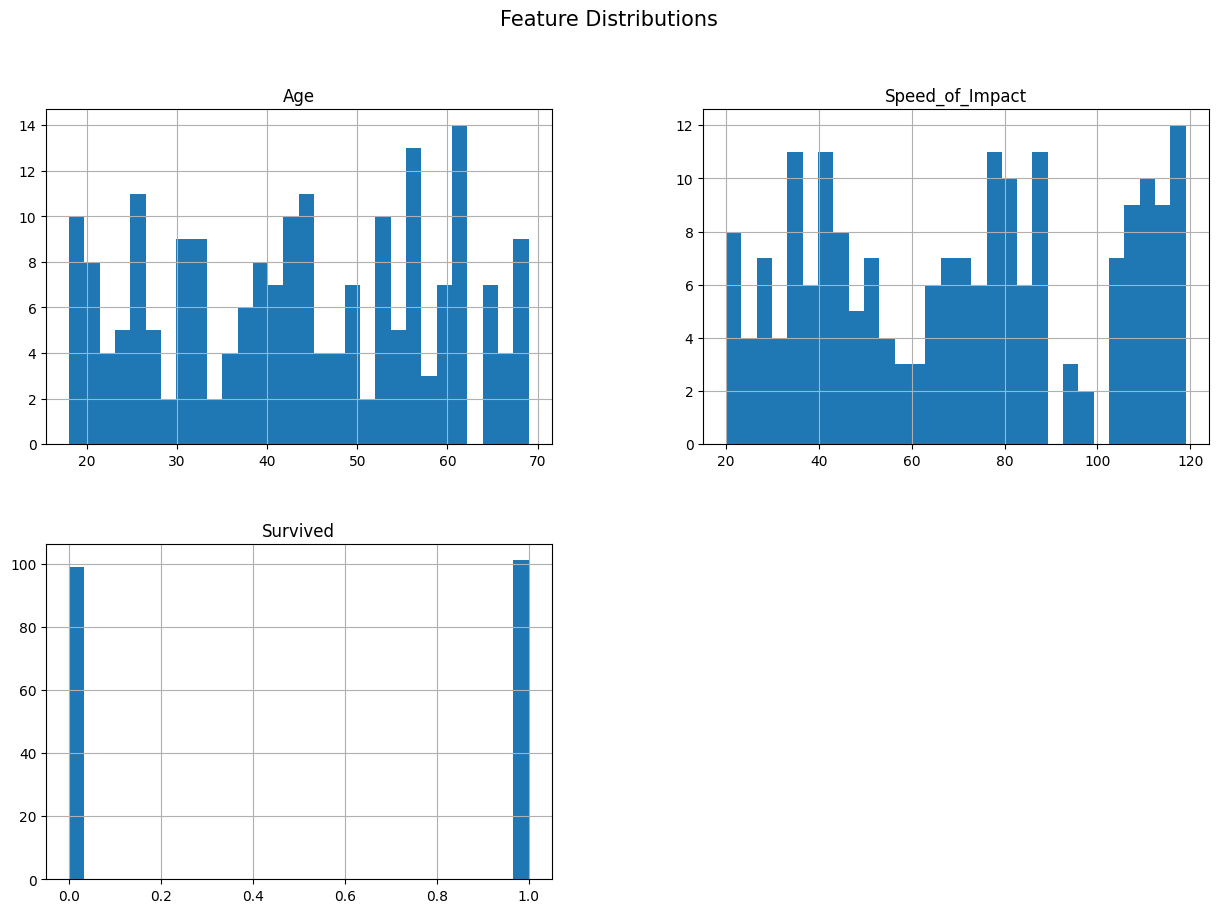

In [45]:
df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=15)
plt.show()


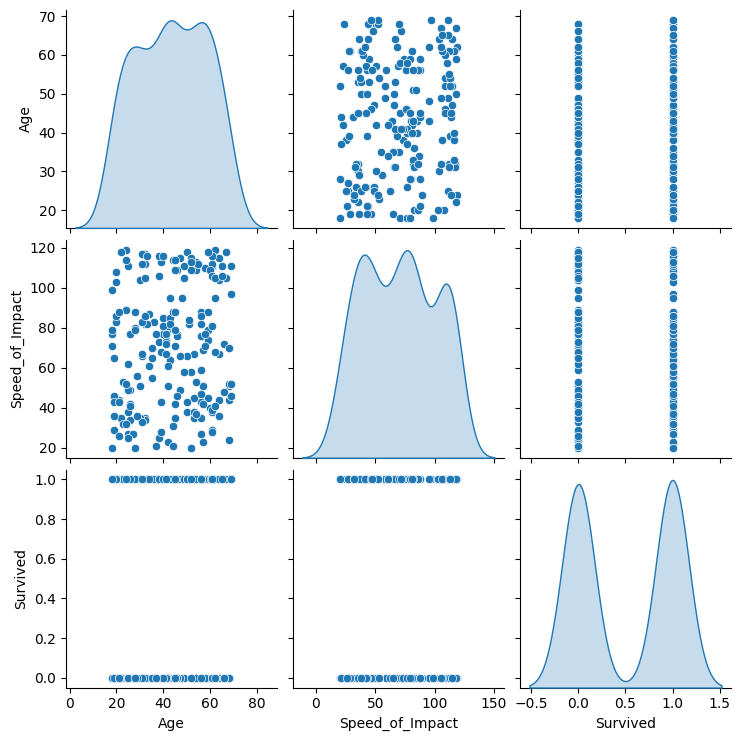

In [46]:
# 4. Pair plot for numerical features
sns.pairplot(df.sample(min(500, len(df))), diag_kind="kde")
plt.show()

<ipython-input-47-a6e6b4857dda>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


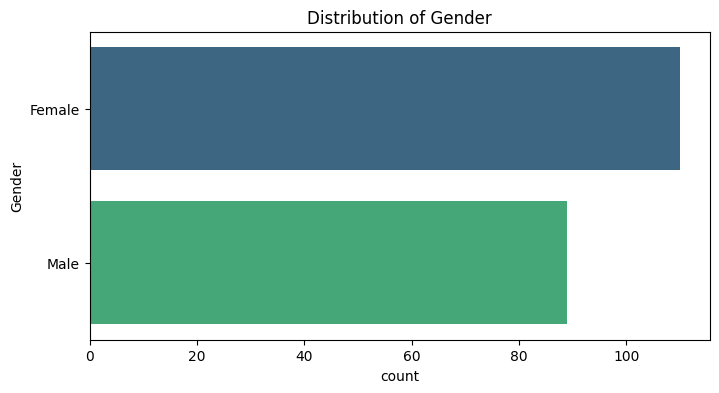

<ipython-input-47-a6e6b4857dda>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


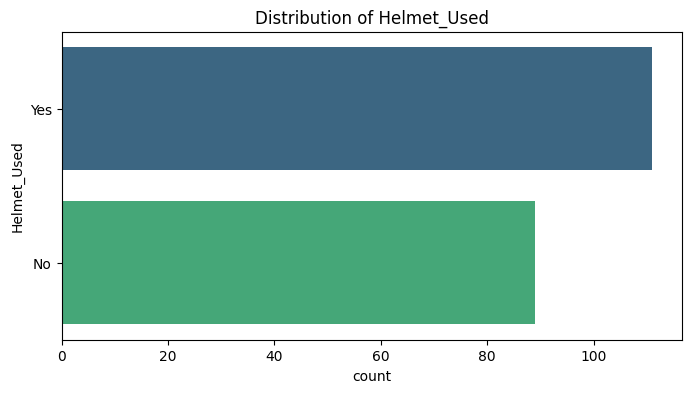

<ipython-input-47-a6e6b4857dda>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')


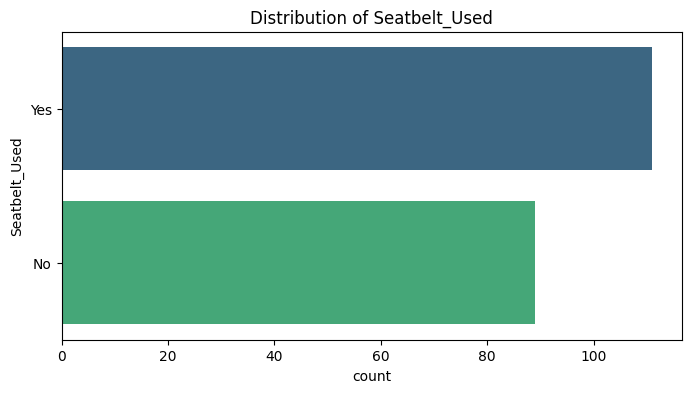

In [47]:

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.show()




In [48]:
# One-hot encoding Gender and dropping the first category
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Display the first few rows to verify encoding
print(df.head())


   Age  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived  Gender_Male
0   56             27.0          No            No         1        False
1   69             46.0          No           Yes         1        False
2   46             46.0         Yes           Yes         0         True
3   32            117.0          No           Yes         0         True
4   60             40.0         Yes           Yes         0        False


In [49]:
df.dtypes

,0
Age,int64
Speed_of_Impact,float64
Helmet_Used,object
Seatbelt_Used,object
Survived,int64
Gender_Male,bool


In [50]:

df['Helmet_Used'] = df['Helmet_Used'].map({'Yes': 1, 'No': 0})
df['Seatbelt_Used'] = df['Seatbelt_Used'].map({'Yes': 1, 'No': 0})

# Verify the changes
print(df.head())


   Age  Speed_of_Impact  Helmet_Used  Seatbelt_Used  Survived  Gender_Male
0   56             27.0            0              0         1        False
1   69             46.0            0              1         1        False
2   46             46.0            1              1         0         True
3   32            117.0            0              1         0         True
4   60             40.0            1              1         0        False


In [51]:
df.corr()

,Age,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived,Gender_Male
Age,1.000000,0.106614,0.094387,-0.006868,0.110090,-0.055910
Speed_of_Impact,0.106614,1.000000,-0.010920,-0.000007,0.042520,-0.048110
Helmet_Used,0.094387,-0.010920,1.000000,0.088977,-0.041353,0.032493
Seatbelt_Used,-0.006868,-0.000007,0.088977,1.000000,0.059263,-0.068732
Survived,0.110090,0.042520,-0.041353,0.059263,1.000000,0.121845
Gender_Male,-0.055910,-0.048110,0.032493,-0.068732,0.121845,1.000000


In [52]:
df.corr()['Survived']

,Survived
Age,0.110090
Speed_of_Impact,0.042520
Helmet_Used,-0.041353
Seatbelt_Used,0.059263
Survived,1.000000
Gender_Male,0.121845


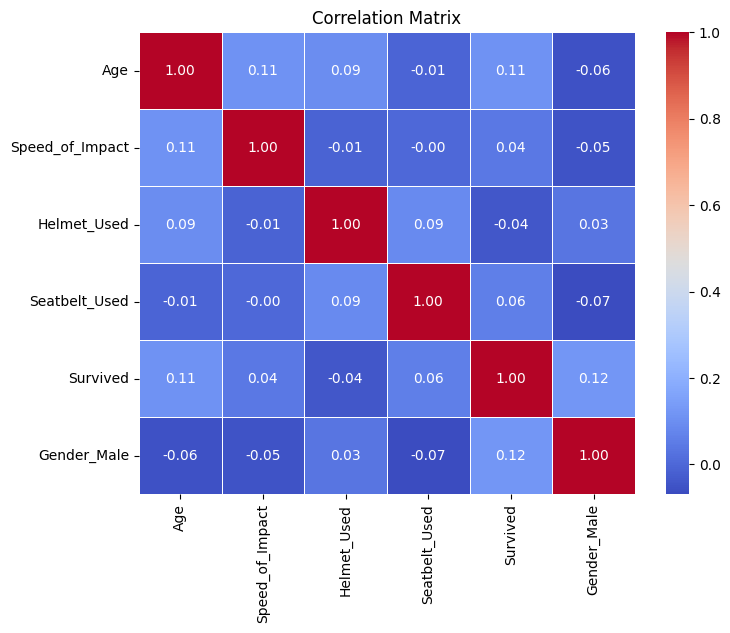

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [54]:
df.isna().sum()

,0
Age,0
Speed_of_Impact,3
Helmet_Used,0
Seatbelt_Used,0
Survived,0
Gender_Male,0


In [55]:
df['Speed_of_Impact']

,Speed_of_Impact
0,27.0
1,46.0
2,46.0
3,117.0
4,40.0
...,...
195,111.0
196,51.0
197,110.0
198,103.0


In [56]:
df.dropna()

,Age,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived,Gender_Male
0,56,27.0,0,0,1,False
1,69,46.0,0,1,1,False
2,46,46.0,1,1,0,True
3,32,117.0,0,1,0,True
4,60,40.0,1,1,0,False
...,...,...,...,...,...,...
195,69,111.0,0,1,1,False
196,30,51.0,0,1,1,False
197,58,110.0,0,1,1,True
198,20,103.0,0,1,1,True


In [57]:
df.isna().sum()

,0
Age,0
Speed_of_Impact,3
Helmet_Used,0
Seatbelt_Used,0
Survived,0
Gender_Male,0


In [58]:
df=df.dropna()

In [59]:
df.isna().sum()

,0
Age,0
Speed_of_Impact,0
Helmet_Used,0
Seatbelt_Used,0
Survived,0
Gender_Male,0


In [60]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Survived'])  # All columns except 'Survived'
y = df['Survived']  # Target variable

# Split the dataset (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Print dataset shapes
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)


Training Set Shape: (177, 5) (177,)
Testing Set Shape: (20, 5) (20,)


In [61]:
from sklearn.preprocessing import StandardScaler


In [62]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [64]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [65]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)



In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the scores
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.67
Recall: 0.40
F1 Score: 0.50


In [67]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 60.00%

Confusion Matrix:
[[8 2]
 [6 4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.67      0.40      0.50        10

    accuracy                           0.60        20
   macro avg       0.62      0.60      0.58        20
weighted avg       0.62      0.60      0.58        20



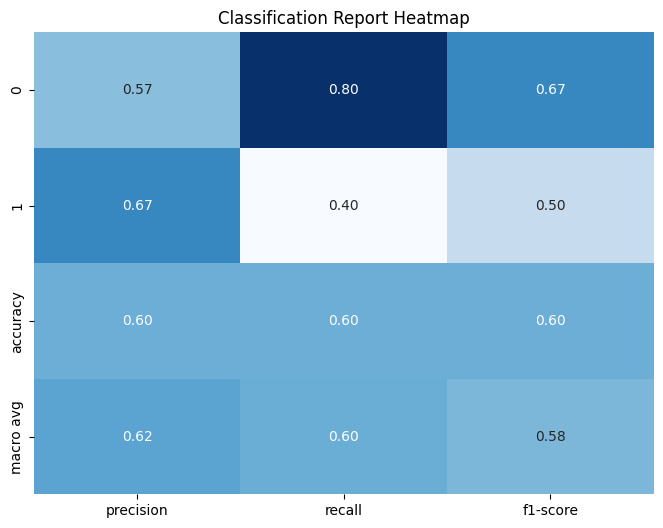

In [68]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.title("Classification Report Heatmap")
plt.show()
